# Lista 9

# Exercicio 1

Definindo as bases para $N(A)$, $C(A)$, $C(A^t)$ e $N(A^t)$

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

A = np.array([[4,0,-1,4],[1,0,-1,2]])

CA= [[1,-1],[4,1]]


NA = [[0,1,0,0],[-7,0,-1,3]]

CAt = [[1,0,-1,2],[4,0,-1,9]]


#N(A^t) = vazio

In [2]:
print("Matriz A = ", A, "\nC(A) = ", CA, "\nN(A) = ", NA, "\nC(A^t) = ", CAt)

Matriz A =  [[ 4  0 -1  4]
 [ 1  0 -1  2]] 
C(A) =  [[1, -1], [4, 1]] 
N(A) =  [[0, 1, 0, 0], [-7, 0, -1, 3]] 
C(A^t) =  [[1, 0, -1, 2], [4, 0, -1, 9]]


## Verificando que $N(A)$ e $C(A^t)$ sao ortogonais:

In [4]:
for i in range(0,2):
    for j in range(0,2):
        print(np.dot(NA[i], CAt[j]))

0
0
0
0


## Como $N(A^t)$ eh vazio, entao $N(A^t)$ e $C(A)$ sao ortogonais

# Exercicio 2

In [60]:
a = [1,2,3,4]
b = [0,-1,0,4]
c = [1,0,1,1]

### Sao LI

In [61]:
q1 = np.divide(a, np.linalg.norm(a))
q1

array([0.18257419, 0.36514837, 0.54772256, 0.73029674])

In [62]:
b1 = b - np.dot(np.dot(q1,b),q1)
q2 = np.divide(b1, np.linalg.norm(b1))
q2

array([-0.1442456 , -0.59758893, -0.43273681,  0.65940847])

In [63]:
c1 = (c-np.dot(np.dot(q1,c),q1)-np.dot(np.dot(q2,c),q2))
q3 = np.divide(c1, np.linalg.norm(c1))
q3

array([ 0.80365408, -0.52203171,  0.25414702, -0.13050793])

In [64]:
Q = np.array([[q1[0],q2[0],q3[0]],[q1[1],q2[1],q3[1]],[q1[2],q2[2],q3[2]],[q1[3],q2[3],q3[3]]])
R = np.array([[np.dot(q1,a),np.dot(q1,b), np.dot(q1,c)],[0,np.dot(q2,b), np.dot(q2,c)],[0,0,np.dot(q3,c)]])

print("Q = ",Q)
print("\nR = ",R)

Q =  [[ 0.18257419 -0.1442456   0.80365408]
 [ 0.36514837 -0.59758893 -0.52203171]
 [ 0.54772256 -0.43273681  0.25414702]
 [ 0.73029674  0.65940847 -0.13050793]]

R =  [[5.47722558 2.5560386  1.46059349]
 [0.         3.23522282 0.08242606]
 [0.         0.         0.92729316]]


In [65]:
QR = np.dot(Q,R)
print(QR)
print(a,b,c)

[[ 1.00000000e+00 -5.55111512e-17  1.00000000e+00]
 [ 2.00000000e+00 -1.00000000e+00 -1.66533454e-16]
 [ 3.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 4.00000000e+00  4.00000000e+00  1.00000000e+00]]
[1, 2, 3, 4] [0, -1, 0, 4] [1, 0, 1, 1]


## Como podemos ver acima, de fato QR = A (desprezando as aproximacoes)

# Exercicio 3

$g_1 = e^x$

$g_2 = e^{-x}$

In [66]:
x = [0,0.5,1.0,1.5,2.0,2.5]
y = [5.02,5.21,6.49,9.54,16.02,24.53]

In [67]:
A = np.zeros((6,2))
for i in range(0,6):
    for j in range(0,3):
        if j==0:
            A[i][j] = math.e**x[i]
        if j==1:
            A[i][j] = math.e**(-x[i])
b = y
print("A = ", A)

A =  [[ 1.          1.        ]
 [ 1.64872127  0.60653066]
 [ 2.71828183  0.36787944]
 [ 4.48168907  0.22313016]
 [ 7.3890561   0.13533528]
 [12.18249396  0.082085  ]]


In [68]:
Q,R = np.linalg.qr(A)

### Lembrando que para resolvermos este problema usando a fatoracao $QR$ temos que resolver $R\overline{x} =Q^tb$

In [69]:
x1 = np.linalg.solve(R, np.dot(Q.T, b))
x1

array([2.02015891, 3.01439791])

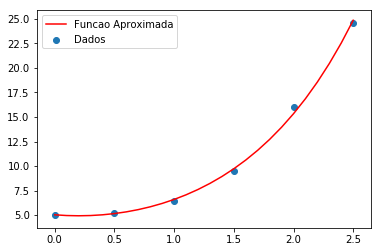

In [70]:
W = []
W = np.arange(0,2.6,0.1)
Yw = []
for w in W:
    p = np.dot([math.e**w, math.e**(-w)], x1)
    Yw.append(p)

plt.plot(W, Yw, "-r", label="Funcao Aproximada")

plt.scatter(x, y, label = "Dados")

plt.legend(loc='upper left')

plt.show()